In [1]:
!pip install gym

    100% |████████████████████████████████| 1.5MB 5.2MB/s 
    100% |████████████████████████████████| 1.0MB 9.8MB/s 
  Running setup.py bdist_wheel for gym ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/cb/14/71/f4ab006b1e6ff75c2b54985c2f98d0644fffe9c1dddc670925
Successfully built gym


In [0]:
import gym
import numpy as np
import random
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
env = gym.make('FrozenLake-v0')

In [0]:
tf.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [0]:
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)

In [0]:
W = tf.Variable(tf.random_uniform([16,4],0,0.01))

In [0]:
Qout = tf.matmul(inputs1,W)

In [0]:
predict = tf.argmax(Qout, 1)

In [0]:
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)

In [0]:
loss = tf.reduce_sum(tf.square(nextQ - Qout))

In [0]:
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [0]:
updateModel = trainer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
y = 0.99
e = 0.1
num_episodes = 10000

In [0]:
jList = []
rList = []

In [0]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        while j < 99:
            j += 1
            # 前回のstatusからQ値を予測
            a,allQ = sess.run([predict,Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            # εグリーディー(ランダムな手を打たせる）
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            s1,r,d,_ = env.step(a[0])
            # 次のQ値の推定値を求める
            Q1 = sess.run(Qout, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            maxQ1 = np.max(Q1)
            targetQ = allQ
            # Q値のターゲットを更新する
            targetQ[0,a[0]] = r + y*maxQ1
            
            # 新しい重みを求める
            _,W1 = sess.run([updateModel,W], feed_dict={inputs1: np.identity(16)[s:s+1], nextQ: targetQ})
            rAll += r
            s = s1
            if d == True:
                # イプシロン（exploreの閾値）を更新
                e = 1.0/((i/50) + 10)
                break
        jList.append(j) # 試行回数のリスト
        rList.append(rAll) # 報酬のリスト
        
print("Success Episode Ratio: " + str(sum(rList) / num_episodes*100) + "%")

Success Episode Ratio: 41.21%


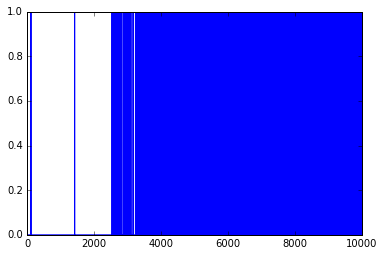

In [0]:
plt.plot(rList)

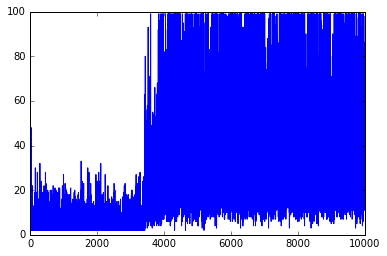

In [0]:
plt.plot(jList)